In [16]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy as sci
import scipy.optimize as opt
from scipy.interpolate import interp1d
np.set_printoptions(threshold=np.inf)

# Experiment 1: Diffraction

In [17]:
fringe_distance = [0.4, 0.65, 1, 1.4]
a = [fringe_distance[i] /(2* (i+1)) for i in range(len(fringe_distance))]

print(a)

print(2.7/16)

[0.2, 0.1625, 0.16666666666666666, 0.175]
0.16875


In [18]:
1.22 * 6.35 * 10**(-5) * 78/(0.23/2)    

0.05254486956521739

In [19]:
l = 79.9
m = 4
d = 1.08
wavelength = 6.35*10**(-5)

print(2* m * wavelength * l/d)

0.03758259259259259


# Experiment 2: Circular Aperture

In [20]:
m = [1, 2, 3, 4]
d = [0.23, 0.38, 0.64,0.79]
beta = [3.8317, 7.0155, 10.17135, 13.3237]
lengtherr = 0.1 
derr = 0.01

7.015 * 6.35 * 10**(-5) * 78/(0.38/2 * np.pi)

aperture = [beta[i] * 6.35 * 10**(-5) * 78/(d[i]/2 * np.pi) for i in range(len(beta))]
print(aperture)

[0.052530570077220035, 0.058213469427922986, 0.05011261614036946, 0.05317973943670672]


In [29]:
lengtherr = 0.1 
derr = 0.01

aperture_err = [aperture[i]/78 * np.sqrt((78**2/(d[i]/2)**2) * derr**2 + lengtherr**2) for i in range(len(d))]
print(aperture_err)

[0.004568372099331292, 0.0030647756646385808, 0.001567336586344216, 0.001348047743122822]


In [22]:
def constant(x, c): 
    return c

optimize, cov = opt.curve_fit(constant, m, aperture)
dango = optimize
dc = np.sqrt(np.diag(cov))

print(f"constant value: {dango} \u00b1 {dc}")

constant value: [0.0535091] ± [0.0017013]


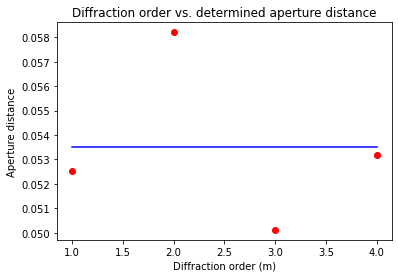

In [23]:
const = [dango]*4
plt.scatter(m, aperture, c = 'r', label="fitted values")
plt.plot(m, const, c = 'b', label="Experimentally verified values")
plt.xlabel("Diffraction order (m)")
plt.ylabel("Aperture distance")
plt.title("Diffraction order vs. determined aperture distance")
plt.show()

# Experiment 3: Varying the Slit Width

In [36]:
m = np.linspace(2, 6, 5)

distance_3 = [0.44, 0.70, 1.09,1.44,1.76]
distance_4 = [0.95, 1.40, 1.80 , 2.32, 2.76]
distance_5 = [1.60, 2.4, 3.0, 4.0] #Distance 5 is shorter 

a3 = [2*m[i] * 79.9 * 6.35 * 10**(-5)/(distance_3[i]) for i in range(len(m))]
a4 = [2*m[i] * 79.9 * 6.35 * 10**(-5)/(distance_4[i]) for i in range(len(m))]
a5 = [2*m[i] * 79.9 * 6.35 * 10**(-5)/(distance_5[i]) for i in range(len(m)-1)]

print(f"slit 3 width {np.mean(a3)}")
print(f"slit 4 width {np.mean(a4)}")
print(f"slit 5 width {np.mean(a5)}")

slit 3 width 0.03933541327660617
slit 4 width 0.021917007108788966
slit 5 width 0.012895527083333334


In [47]:
d3err = [0.05] + [0.1]*4
d4err = [0.05]*5
d5err = [0.05, 0.1, 0.2, 0.2]

a3err = [2*m[i] * 79.9 * 6.35 * 10**(-5)/(distance_3[i])**2 * d3err[i] for i in range(len(m))]
a4err = [2*m[i] * 79.9 * 6.35 * 10**(-5)/(distance_4[i])**2 * d4err[i] for i in range(len(m))]
a5err = [2*m[i] * 79.9 * 6.35 * 10**(-5)/(distance_5[i])**2 * d5err[i] for i in range(len(m)-1)]

print(f"slit 3 err {np.mean(a3err)}")
print(f"slit 4 err {np.mean(a4err)}")
print(f"slit 5 err {np.mean(a5err)}")

slit 3 err 0.00033323860008637395
slit 4 err 3.398254618671915e-05
slit 5 err 9.497679014756948e-05


In [41]:
residual3 = [(a3[i] - 0.03544)**2 for i in range(len(m))]
residual4 = [(a4[i] - 0.017572)**2 for i in range(len(m))]
residual5 = [(a5[i] - 0.008786)**2 for i in range(len(m)-1)]

print(f"residual 3 {residual3}")
print(f"residual 4 {residual4}")
print(f"residual 5 {residual5}")

residual 3 [0.00011414979855371912, 6.477720246938791e-05, 3.232078242572176e-06, 4.2567713155863604e-08, 7.172935046487569e-07]
residual 4 [1.4369685806094211e-05, 1.74073720459184e-05, 2.4776059308642e-05, 1.846576484311833e-05, 2.013629051228738e-05]
residual 5 [1.5195378515625005e-05, 1.5195378515625018e-05, 2.250300593777779e-05, 1.5195378515625005e-05]


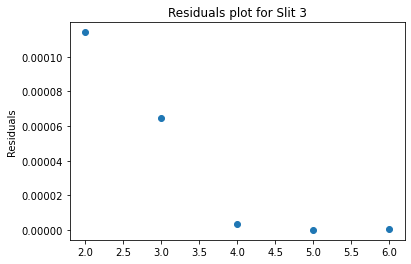

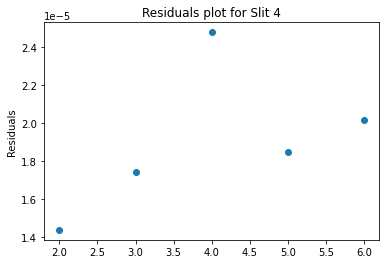

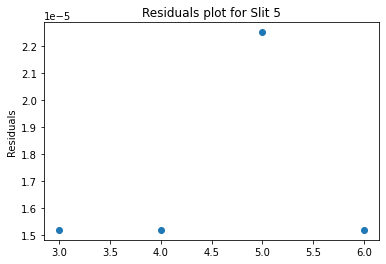

In [40]:
plt.scatter(m, residual3)
plt.title("Residuals plot for Slit 3")
plt.ylabel("Residuals")
plt.show()

plt.scatter(m, residual4)
plt.title("Residuals plot for Slit 4")
plt.ylabel("Residuals")
plt.show()

plt.scatter(m[1:len(m)], residual5)
plt.title("Residuals plot for Slit 5")
plt.ylabel("Residuals")
plt.show()

# Experiment 5: Double Thick Slit

In [69]:
n = np.linspace(1, 5, 5)
m_d = np.linspace(1, 6, 6)

a_min_1 = [0.88 ,1.70 , 2.75 , 3.68 , 4.64]
a_min_1_err = 0.1

d_max_1 = [0.20,0.38,0.54,0.70,0.90]
d_max_1_err = [0.03] * 2 + [0.05] * 3

a_min_2 = [0.90 ,1.8 ,2.9 ,3.7 ]
a_min_2_err = [0.05, 0.1, 0.1, 0.2]

d_max_2 = [0.25,0.40 , 0.7,1.0 ,1.3 ,1.6]
d_max_2_err = [0.03, 0.05] + [0.1] * 4


thick_a1 = [2 * n[i] * 6.35 * 10**(-5) *83.7/(a_min_1[i]) for i in range(len(n))]   
thick_d1 = [2 * m_d[i+1] * 6.35 * 10**(-5) * 83.7/d_max_1[i] for i in range(len(m_d)-1)]

thick_a2 = [2 * n[i] * 6.35 * 10**(-5) *83.7/(a_min_2[i]) for i in range(len(n)-1)]
thick_d2 = [2 * m_d[i] * 6.35 * 10**(-5) * 236/d_max_2[i] for i in range(len(m_d))]

print(f"a1: {np.mean(thick_a1)}")
print(f"d1: {np.mean(thick_d1)} \n")

print(f"a2: {np.mean(thick_a2)}")
print(f"d2: {np.mean(thick_d2)}")


a1: 0.01183806476412863
d1: 0.08315062406015036 

a2: 0.011527558014911461
d2: 0.12429322527472526


In [48]:
print(m_d)

[1. 2. 3. 4. 5. 6.]


In [54]:
alpha_a1 = [2 * n[i] * 83.7 * 6.35 * 10**(-5)/(a_min_1[i]**2) * a_min_1_err**2 for i in range(len(n))]
alpha_d1 = [2 * m_d[i+1] * 6.35 * 10**(-5) * 83.7/(d_max_1[i]**2) * d_max_1_err[i]**2 for i in range(len(m_d) -1)]

alpha_a2 = [2 * n[i] * 83.7 * 6.35 * 10**(-5)/(a_min_2[i]**2) * a_min_2_err[i]**2 for i in range(len(n)-1)]
alpha_d2 = [2 * m_d[i] * 6.35 * 10**(-5) * 236/(d_max_2[i]**2) * d_max_2_err[i]**2 for i in range(len(m_d))]

print(f"error a1: {np.mean(alpha_a1)}")
print(f"error d1: {np.mean(alpha_d1)} \n")
print(f"error a2: {np.mean(alpha_a2)}")
print(f"error d2: {np.mean(alpha_d2)} \n")

error a1: 6.181637802767774e-05
error d1: 0.00030193239468198483 

error a2: 6.51448218808438e-05
error d2: 0.000998556086715574 



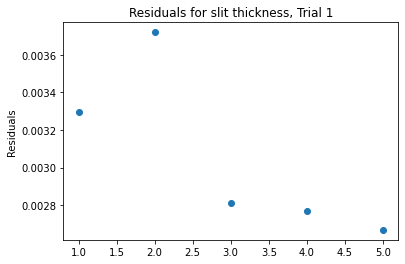

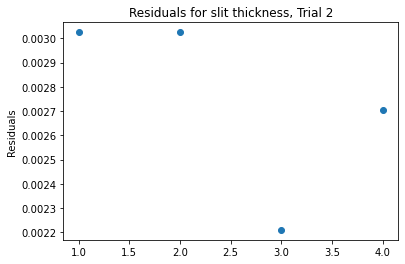

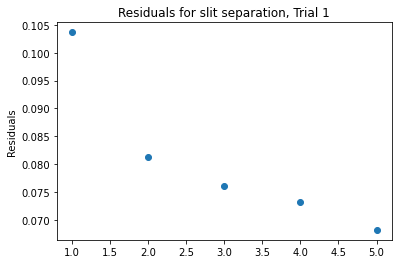

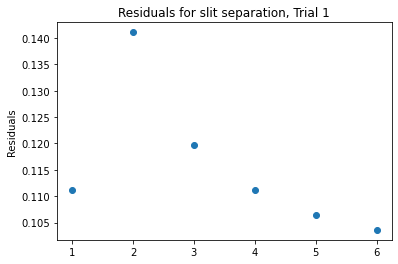

In [65]:
alpha_errors_a1 = [thick_a1[i] - 0.008786 for i in range(len(thick_a1))]
alpha_errors_d1 = [thick_d1[i] - 0.0026358 for i in range(len(thick_d1))]

alpha_errors_a2 = [thick_a2[i] - 0.008786 for i in range(len(thick_a2))]
alpha_errors_d2 = [thick_d2[i] - 0.008786 for i in range(len(thick_d2))]

plt.scatter(n, alpha_errors_a1)
plt.title("Residuals for slit thickness, Trial 1")
plt.ylabel("Residuals")
plt.show()

plt.scatter(n[0:len(n)-1], alpha_errors_a2)
plt.title("Residuals for slit thickness, Trial 2")
plt.ylabel("Residuals")
plt.show()

plt.scatter(m_d[0:len(m_d)-1], alpha_errors_d1)
plt.title("Residuals for slit separation, Trial 1")
plt.ylabel("Residuals")
plt.show()

plt.scatter(m_d, alpha_errors_d2)
plt.title("Residuals for slit separation, Trial 1")
plt.ylabel("Residuals")
plt.show()